# Video Game Sales - Exploratory Data Analysis

This notebook performs exploratory data analysis on video game sales data.

## Dataset Information

The dataset contains the following columns:
- **Name**: Title of the game
- **Platform**: Gaming platform
- **Year_of_Release**: Year the game was released
- **Genre**: Game genre
- **Publisher**: Company that published the game
- **NA_Sales**: Sales in North America (millions)
- **EU_Sales**: Sales in Europe (millions)
- **JP_Sales**: Sales in Japan (millions)
- **Other_Sales**: Sales in other regions (millions)
- **Global_Sales**: Total worldwide sales (millions)
- **Critic_Score**: Aggregate score by Metacritic staff
- **Critic_Count**: Number of critics
- **User_Score**: Score by Metacritic subscribers
- **User_Count**: Number of user ratings
- **Developer**: Game developer
- **Rating**: ESRB rating

## 1. Setup and Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add src directory to path
sys.path.append('../src')

# Import custom utilities
from data_utils import (
    load_video_game_data,
    get_data_info,
    clean_video_game_data,
    filter_by_year,
    get_top_games_by_sales,
    get_sales_by_platform,
    get_sales_by_genre
)

from visualization import (
    plot_sales_trend_by_year,
    plot_top_platforms,
    plot_top_genres,
    plot_regional_sales_comparison,
    plot_sales_distribution,
    plot_score_vs_sales,
    plot_correlation_heatmap,
    plot_top_publishers
)

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
sns.set_style('whitegrid')
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load the data
# Replace 'your_data_file.csv' with the actual path to your data file
data_path = '../data/raw/Video_Games_Sales_as_at_22_Dec_2016.csv'
df = load_video_game_data(data_path)

# For demonstration purposes, we'll create a sample dataframe structure
# print("Please load your video game sales data file")
# print("Example: df = load_video_game_data('../data/raw/video_game_sales.csv')")

## 2. Initial Data Exploration

In [3]:
# Display basic information about the dataset
get_data_info(df)

Dataset Shape: (16719, 16)

Column Names:
['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']

Data Types:
Name                   str
Platform               str
Year_of_Release    float64
Genre                  str
Publisher              str
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score             str
User_Count         float64
Developer              str
Rating                 str
dtype: object

Missing Values:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic

In [4]:
# Display first few rows
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Data Cleaning

In [5]:
# Clean the data
df_clean = clean_video_game_data(df)
print("Data cleaned successfully")

Data cleaned successfully


## 4. Sales Analysis

### 4.1 Top Games by Global Sales

In [6]:
# Get top 20 games by global sales
top_games = get_top_games_by_sales(df_clean, n=20)
top_games[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Global_Sales']]

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,29.80
7,Wii Play,Wii,2006.0,Misc,Nintendo,28.92
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,28.32
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,28.31


### 4.2 Sales by Platform

          NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform                                                         
PS2         583.84    339.29    139.20       193.44       1255.64
X360        602.47    270.76     12.43        85.76        971.63
PS3         393.49    330.29     80.19       135.68        939.43
Wii         496.90    262.21     69.33        79.07        908.13
DS          382.67    188.89    175.57        59.28        807.10
PS          336.52    213.61    139.82        40.91        730.68
GBA         187.54     75.25     47.33         7.73        318.50
PS4         108.74    141.09     16.00        48.35        314.23
PSP         109.17     66.68     76.78        41.42        294.30
PC           94.53    142.44      0.17        22.38        260.30


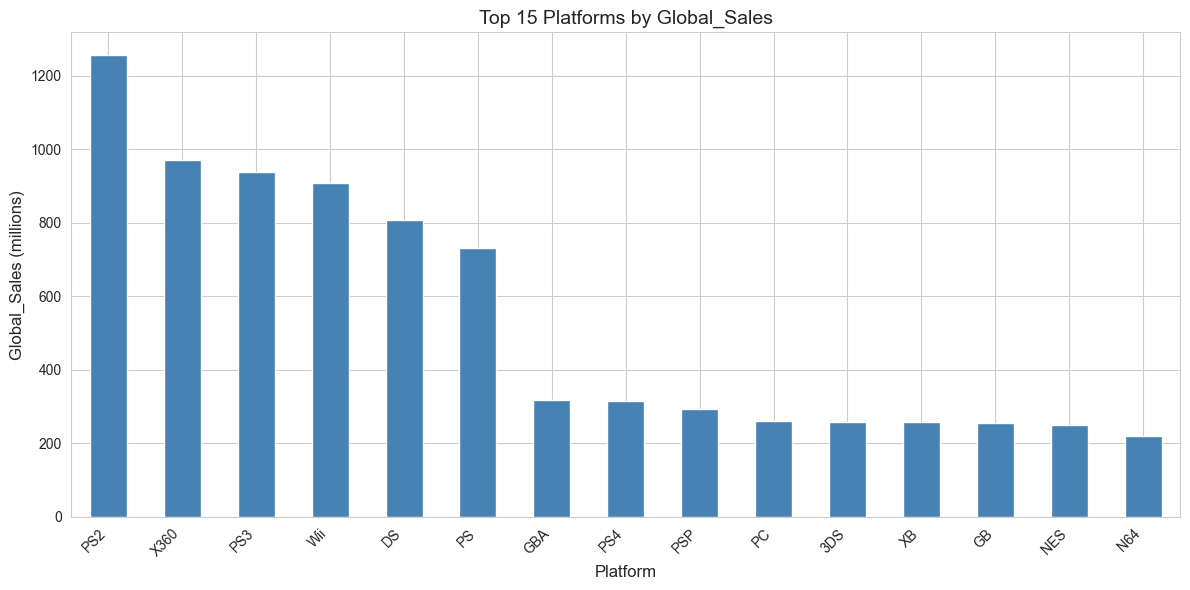

In [7]:
# Analyze sales by platform
platform_sales = get_sales_by_platform(df_clean)
print(platform_sales.head(10))

# Visualize top platforms
plot_top_platforms(df_clean, n=15)

### 4.3 Sales by Genre

              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Genre                                                                
Action          879.01    519.13    161.44       184.60       1745.27
Sports          684.43    376.79    135.54       134.51       1332.00
Shooter         592.24    317.34     38.76       104.11       1052.94
Role-Playing    330.81    188.71    355.46        59.63        934.40
Platform        445.50    200.35    130.83        51.09        828.08
Misc            407.27    212.74    108.11        74.39        803.18
Racing          359.35    236.51     56.71        76.10        728.90
Fighting        223.36    100.33     87.48        36.36        447.48
Simulation      182.19    113.52     63.80        30.75        390.42
Puzzle          122.87     50.01     57.31        12.38        243.02
Adventure       105.26     63.54     52.30        16.49        237.69
Strategy         68.55     45.17     49.66        10.85        174.50


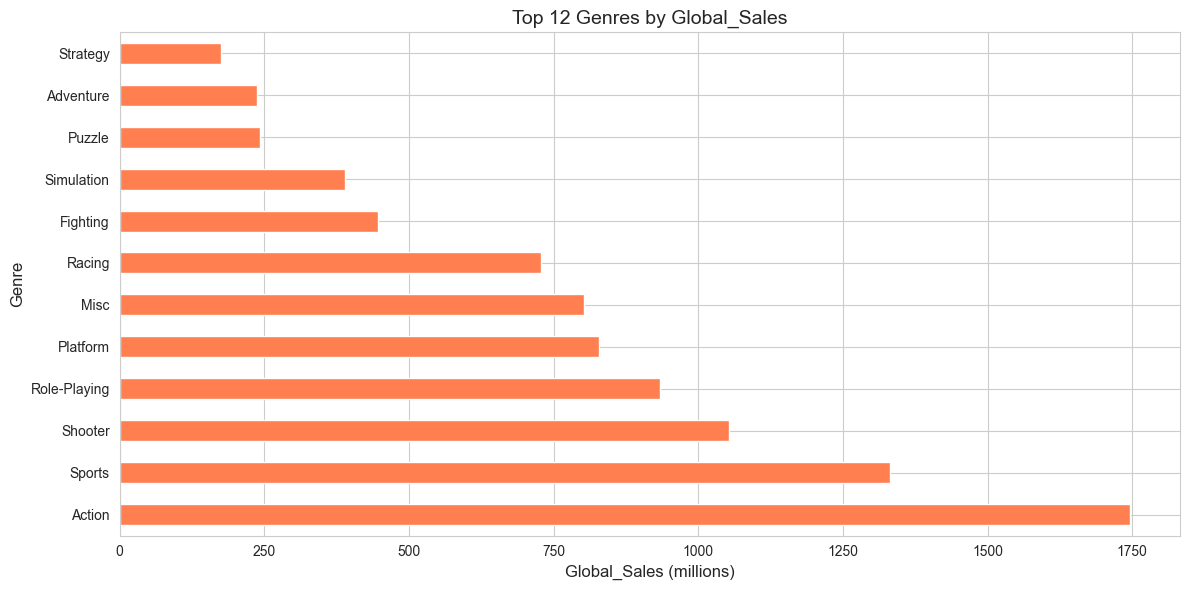

In [8]:
# Analyze sales by genre
genre_sales = get_sales_by_genre(df_clean)
print(genre_sales)

# Visualize top genres
plot_top_genres(df_clean, n=12)

### 4.4 Regional Sales Comparison

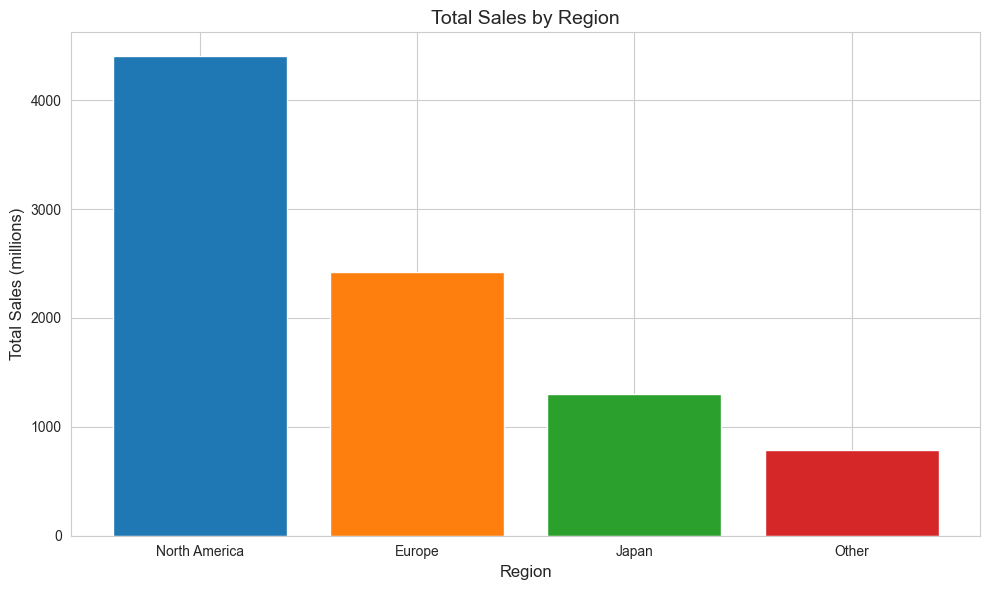

In [9]:
# Compare sales across regions
plot_regional_sales_comparison(df_clean)

### 4.5 Sales Trends Over Time

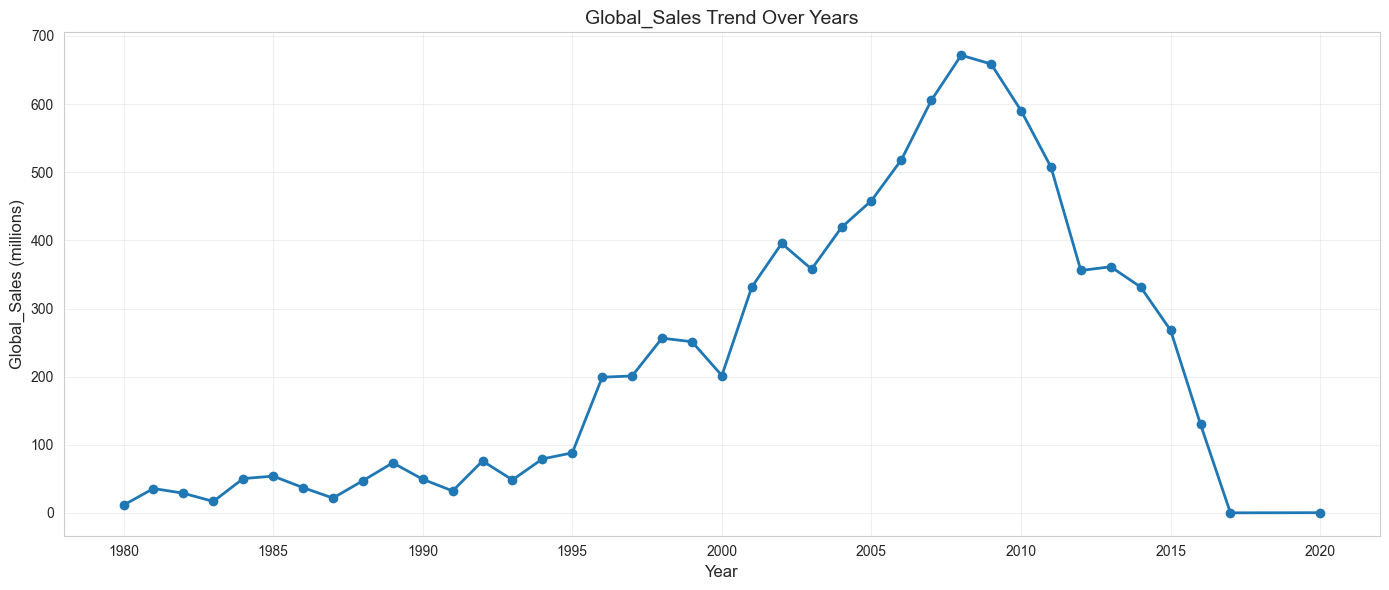

In [10]:
# Plot sales trends by year
plot_sales_trend_by_year(df_clean, sales_column='Global_Sales')

## 5. Publisher and Developer Analysis

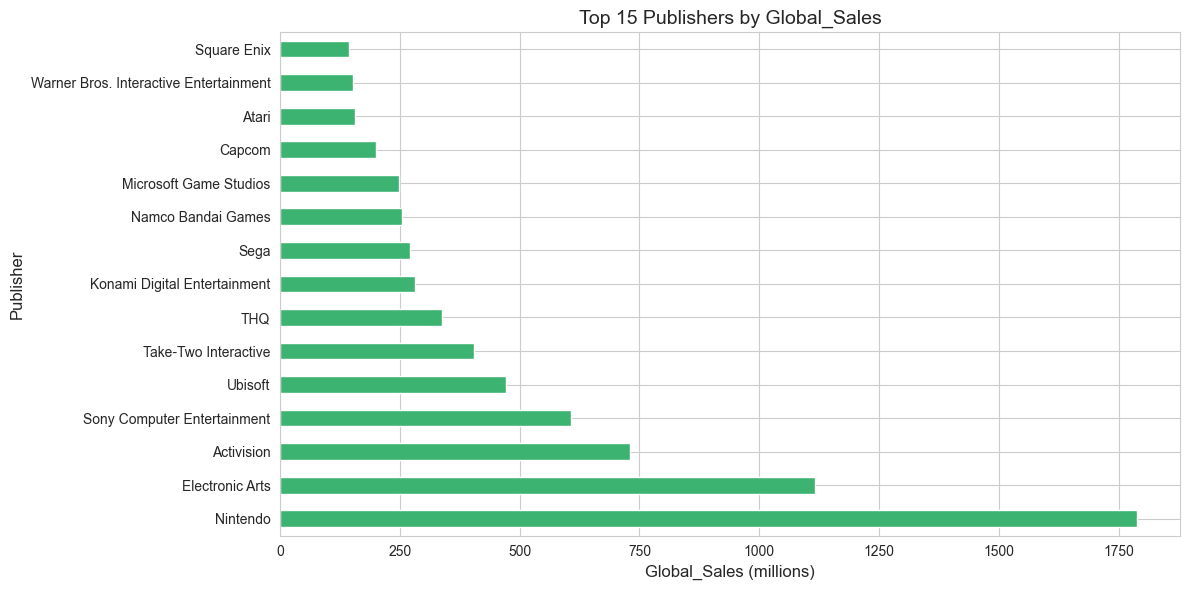

In [11]:
# Analyze top publishers
plot_top_publishers(df_clean, n=15)

## 6. Score Analysis

### 6.1 Critic Score vs Sales

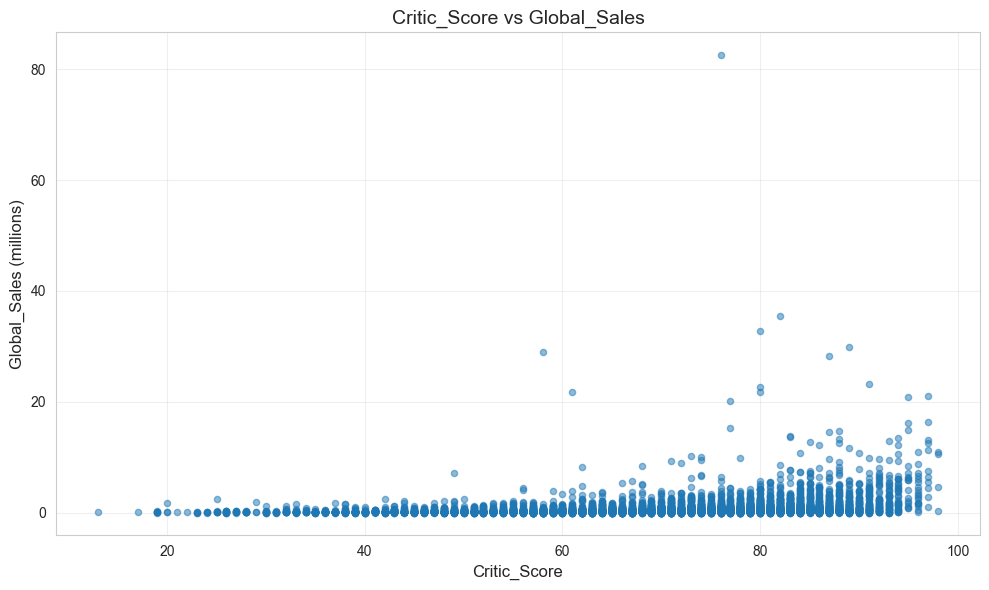

In [12]:
# Analyze relationship between critic scores and sales
plot_score_vs_sales(df_clean, score_column='Critic_Score', sales_column='Global_Sales')

### 6.2 User Score vs Sales

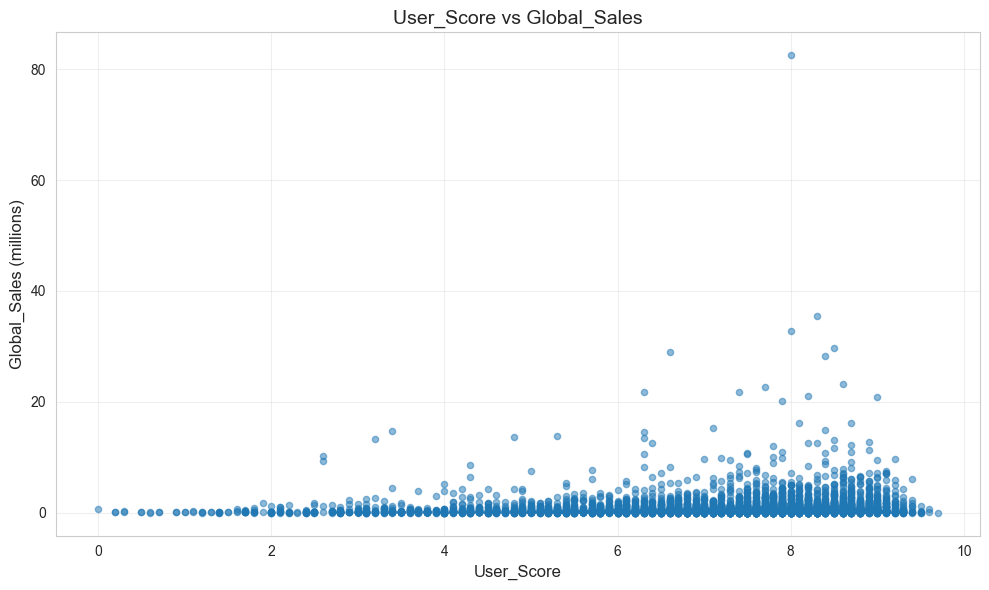

In [13]:
# Analyze relationship between user scores and sales
plot_score_vs_sales(df_clean, score_column='User_Score', sales_column='Global_Sales')

## 7. Correlation Analysis

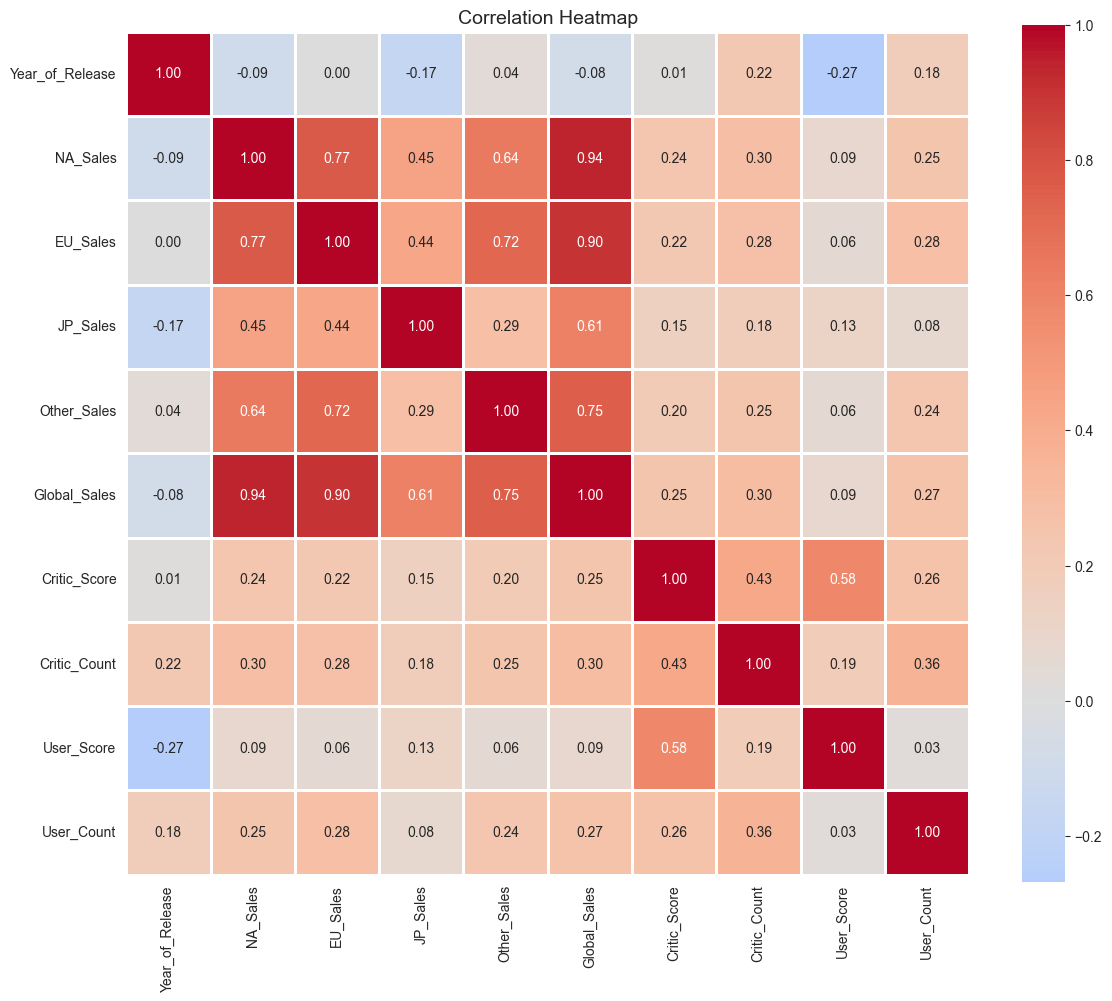

In [14]:
# Generate correlation heatmap
plot_correlation_heatmap(df_clean)

## 8. Rating Analysis

            sum      mean  count
Rating                          
E       2436.90  0.610599   3991
T       1494.40  0.504694   2961
M       1473.84  0.942956   1563
E10+     655.81  0.461838   1420
K-A        4.33  1.443333      3
AO         1.95  1.950000      1
EC         1.78  0.222500      8
RP         0.08  0.026667      3


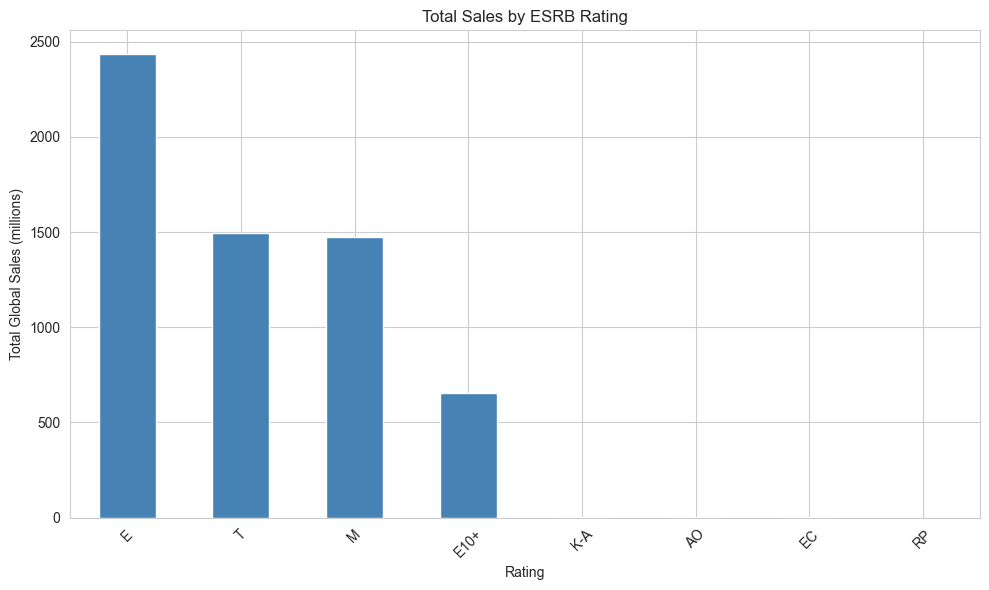

In [15]:
# Analyze sales by ESRB rating
if 'Rating' in df_clean.columns:
    rating_sales = df_clean.groupby('Rating')['Global_Sales'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending=False)
    print(rating_sales)
    
    # Visualize
    plt.figure(figsize=(10, 6))
    rating_sales['sum'].plot(kind='bar', color='steelblue')
    plt.xlabel('Rating')
    plt.ylabel('Total Global Sales (millions)')
    plt.title('Total Sales by ESRB Rating')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 9. Summary and Insights

Based on the analysis, key insights can be derived:

1. **Sales Trends**: Identify how video game sales have evolved over time
2. **Popular Platforms**: Determine which gaming platforms have the highest sales
3. **Top Genres**: Understand which game genres are most successful
4. **Regional Preferences**: Analyze regional differences in gaming preferences
5. **Score Impact**: Evaluate how critic and user scores correlate with sales
6. **Publisher Success**: Identify the most successful publishers in the industry
7. **Rating Distribution**: Understand the relationship between ESRB ratings and sales